# Todo before class

Install plotly, scipy

Start jupyter notebook in chrome?

https://towardsdatascience.com/fourier-transformation-and-its-mathematics-fff54a6f6659

Download data

# Beginning of class

HW review?

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly.express as px
from scipy import signal
import time

# Basic Data Exploration

In [3]:
df = pd.read_csv('temperature.csv')

In [4]:
df.head()

datetime   Vancouver    Portland  San Francisco     Seattle  \
0  2012-10-01 12:00:00         NaN         NaN            NaN         NaN   
1  2012-10-01 13:00:00  284.630000  282.080000     289.480000  281.800000   
2  2012-10-01 14:00:00  284.629041  282.083252     289.474993  281.797217   
3  2012-10-01 15:00:00  284.626998  282.091866     289.460618  281.789833   
4  2012-10-01 16:00:00  284.624955  282.100481     289.446243  281.782449   

   Los Angeles   San Diego   Las Vegas     Phoenix  Albuquerque  ...  \
0          NaN         NaN         NaN         NaN          NaN  ...   
1   291.870000  291.530000  293.410000  296.600000   285.120000  ...   
2   291.868186  291.533501  293.403141  296.608509   285.154558  ...   
3   291.862844  291.543355  293.392177  296.631487   285.233952  ...   
4   291.857503  291.553209  293.381213  296.654466   285.313345  ...   

   Philadelphia    New York    Montreal      Boston   Beersheba  \
0           NaN         NaN         NaN         NaN         NaN   
1    285.630000  288.220000  285.830000  287.170000  307.590000   
2    285.663208  288.247676  285.834650  287.186092  307.590000   
3    285.756824  288.326940  285.847790  287.231672  307.391513   
4    285.850440  288.406203  285.860929  287.277251  307.145200   

   Tel Aviv District       Eilat  Haifa  Nahariyya  Jerusalem  
0                NaN  309.100000    NaN        NaN        NaN  
1         305.470000  310.580000  304.4      304.4      303.5  
2         304.310000  310.495769  304.4      304.4      303.5  
3         304.281841  310.411538  304.4      304.4      303.5  
4         304.238015  310.327308  304.4      304.4      303.5  

[5 rows x 37 columns]

In [54]:
df['datetime'] = pd.to_datetime(df['datetime'])

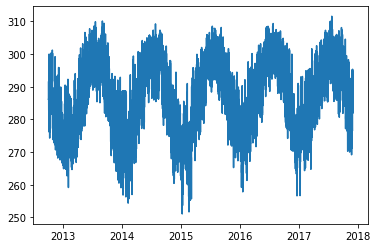

In [6]:
plt.plot(df['datetime'], df['Saint Louis'])

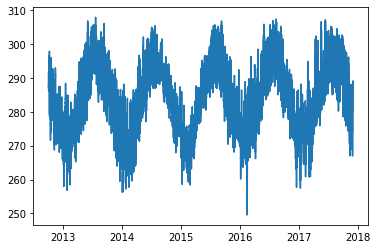

In [9]:
plt.plot(df['datetime'], df['Boston'])

#### Discussion

Why are the temperature values between 250 and 310? What might you change them to?

Why does the data look so noisy?

What kinds of things would you like to be able to do to clean up this data?

What problems would you like to be able to check for?

# Dealing with missing values in time series data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           45253 non-null  datetime64[ns]
 1   Vancouver          44458 non-null  float64       
 2   Portland           45252 non-null  float64       
 3   San Francisco      44460 non-null  float64       
 4   Seattle            45250 non-null  float64       
 5   Los Angeles        45250 non-null  float64       
 6   San Diego          45252 non-null  float64       
 7   Las Vegas          45252 non-null  float64       
 8   Phoenix            45250 non-null  float64       
 9   Albuquerque        45252 non-null  float64       
 10  Denver             45252 non-null  float64       
 11  San Antonio        45252 non-null  float64       
 12  Dallas             45249 non-null  float64       
 13  Houston            45250 non-null  float64       
 14  Kansas

In [11]:
df.describe()

Vancouver      Portland  San Francisco       Seattle   Los Angeles  \
count  44458.000000  45252.000000   44460.000000  45250.000000  45250.000000   
mean     283.862654    284.992929     288.155821    284.409626    290.846116   
std        6.640131      7.452438       5.332862      6.547986      6.460823   
min      245.150000    262.370000     272.300000    263.780000    266.503667   
25%      279.160000    279.850000     284.670000    279.830000    286.380000   
50%      283.450000    284.320000     287.610000    283.940000    290.530000   
75%      288.600785    289.451750     291.015167    288.530000    295.080000   
max      307.000000    312.520000     313.620000    307.300000    315.470000   

          San Diego     Las Vegas       Phoenix   Albuquerque        Denver  \
count  45252.000000  45252.000000  45250.000000  45252.000000  45252.000000   
mean     290.215044    292.424887    295.493358    285.617856    282.839407   
std        5.889992     10.829522      9.916743      9.853484     10.673464   
min      265.783333    260.561333    266.059000    255.042333    247.727667   
25%      286.254750    283.920000    287.680000    277.970000    275.060000   
50%      290.118750    292.027486    295.586667    286.120000    282.970667   
75%      294.107542    300.835000    303.050000    292.835643    290.680000   
max      313.360000    318.640000    321.220000    312.710000    313.750000   

       ...  Philadelphia      New York      Montreal        Boston  \
count  ...  45250.000000  44460.000000  45250.000000  45250.000000   
mean   ...    285.374168    285.400406    280.343010    283.779823   
std    ...     10.242377     10.220932     11.953626      9.802499   
min    ...    250.390000    250.774000    243.300000    249.540000   
25%    ...    277.350636    277.370000    271.971750    276.090000   
50%    ...    285.927583    285.870000    281.109000    284.133250   
75%    ...    293.796000    293.760000    290.369583    291.620000   
max    ...    308.000000    310.240000    307.880000    308.000000   

          Beersheba  Tel Aviv District         Eilat         Haifa  \
count  44455.000000       44460.000000  44461.000000  44455.000000   
mean     291.521986         294.512307    296.497276    295.266398   
std        7.821815           6.676412      8.852984      6.324566   
min      272.179000         271.049000    271.150000    271.150000   
25%      285.366623         289.450000    289.734000    290.467333   
50%      290.932667         294.900000    296.150000    294.820000   
75%      297.270000         299.800000    303.150000    299.660000   
max      314.820000         320.930000    320.150000    320.930000   

          Nahariyya     Jerusalem  
count  44456.000000  44460.000000  
mean     294.094803    293.184253  
std        6.304118      7.093583  
min      268.682000    272.974000  
25%      289.881833    287.524279  
50%      294.150000    292.996000  
75%      298.930000    299.150000  
max      313.150000    317.040000  

[8 rows x 36 columns]

In [13]:
px.line(df, x='datetime', y='Boston')

In [55]:
df.loc[df['Boston'].isnull()]

datetime  Vancouver    Portland  San Francisco     Seattle  \
0    2012-10-01 12:00:00        NaN         NaN            NaN         NaN   
3859 2013-03-11 07:00:00        NaN  277.776667        281.998  277.216667   
3860 2013-03-11 08:00:00        NaN  276.903333        280.756  276.633333   

      Los Angeles   San Diego   Las Vegas  Phoenix  Albuquerque  ...  \
0             NaN         NaN         NaN      NaN          NaN  ...   
3859          NaN  281.816667  283.353333      NaN      271.568  ...   
3860          NaN  281.563333  282.786667      NaN      268.966  ...   

      Philadelphia    New York  Montreal  Boston   Beersheba  \
0              NaN         NaN       NaN     NaN         NaN   
3859           NaN  274.036667       NaN     NaN  289.421333   
3860           NaN  273.603333       NaN     NaN  292.842667   

      Tel Aviv District    Eilat       Haifa  Nahariyya   Jerusalem  
0                   NaN  309.100         NaN        NaN         NaN  
3859            289.795  290.265  289.521333        NaN  287.156667  
3860            291.440  293.830  290.242667        NaN  287.993333  

[3 rows x 37 columns]

In [66]:
#x is time stamps, xp is x's for existing records, fp is y's for xps
x = df['datetime']
knowns = df.loc[~df['Vancouver'].isnull(), ['datetime','Vancouver']]
xp = knowns['datetime']
fp = np.array(knowns['Vancouver'])

test = pd.DataFrame({'datetime':x, 'Vancouver': np.interp(x, xp, fp)})

In [67]:
px.line(test, x='datetime', y='Vancouver')

#### Discussion

What else could you do to address missing values, especially if they were frequent and evenly distributed?

When might it be a bad idea to use the np.interp function, and what other options might you have? (Hint: check out the scipy interpolation functions)

# Intro to Fourier Analysis

[ 0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427 -0.2794155
  0.6569866   0.98935825  0.41211849 -0.54402111 -0.99999021 -0.53657292
  0.42016704  0.99060736  0.65028784 -0.28790332 -0.96139749 -0.75098725
  0.14987721  0.91294525  0.83665564 -0.00885131 -0.8462204  -0.90557836
 -0.13235175  0.76255845  0.95637593  0.27090579 -0.66363388 -0.98803162
 -0.40403765  0.55142668  0.99991186  0.52908269 -0.42818267 -0.99177885
 -0.64353813  0.29636858  0.96379539  0.74511316 -0.15862267 -0.91652155
 -0.83177474  0.01770193  0.85090352  0.90178835  0.12357312 -0.76825466
 -0.95375265 -0.26237485  0.67022918  0.98662759  0.39592515 -0.55878905
 -0.99975517 -0.521551    0.43616476  0.99287265  0.63673801 -0.30481062
 -0.96611777 -0.7391807   0.1673557   0.92002604  0.82682868 -0.02655115
 -0.85551998 -0.89792768 -0.11478481  0.77389068  0.95105465  0.25382336
 -0.67677196 -0.98514626 -0.38778164  0.56610764  0.99952016  0.51397846
 -0.44411267 -0.99388865 -0.62988799  0.31322878  0.

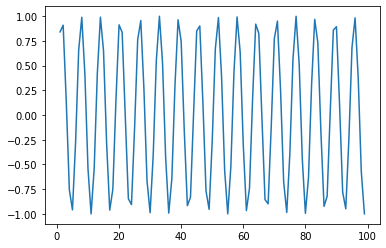

In [70]:
x = np.arange(1,100,1)
y = np.sin(x)
print(y)
plt.plot(x,y)
plt.show()

[ 0.37919463  0.38926657  0.4189444   0.46710903  0.53307131  0.61741159
  0.72254623  0.85333632  1.01817057  1.23115357  1.5167399   1.9203598
  2.53613826  3.59505674  5.85439396 14.07672552 45.15968051  9.12944792
  5.21414346  3.71161672  2.91643876  2.42412142  2.08930761  1.8469039
  1.66339877  1.51978002  1.40445796  1.30996513  1.23127333  1.16487309
  1.10824099  1.05951662  1.01729887  0.98051314  0.94832224  0.92006509
  0.89521359  0.87334175  0.85410313  0.83721418  0.82244174  0.80959355
  0.798511    0.78906353  0.78114432  0.77466696  0.76956282  0.76577912
  0.76327747  0.76203283]
[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0

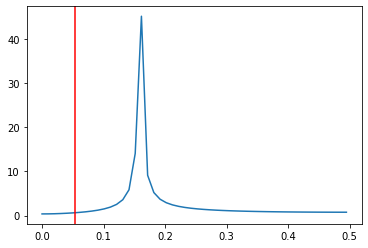

In [71]:
psd = np.abs(np.fft.rfft(y))
print(psd)
freqs = np.fft.rfftfreq(len(y))
print(freqs)
plt.plot(freqs, psd)
plt.axvline(1/(6*np.pi), c='r')

#### Discussion/exploration

Try changing the period of the sine fuction.

Try adding multiple sine functions of different periods together - what happens?

# Fourier analysis applied to real data; Welch's method

In [79]:
psd = np.abs(np.fft.rfft(test['Vancouver']))
fs = np.fft.rfftfreq(len(test['Vancouver']))

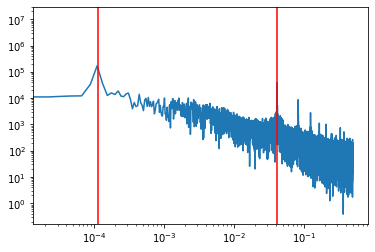

In [80]:
plt.plot(fs, psd)
plt.axvline(x=1/24, c='red')
plt.axvline(x=1/(24*365), c='red')
plt.xscale('log')
plt.yscale('log')

In [81]:
fs, psd = signal.welch(test['Vancouver'], nperseg=10000, window='hann')

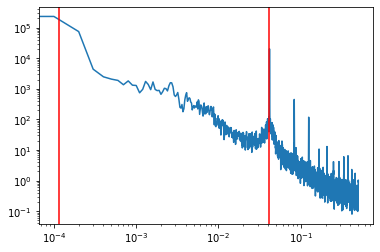

In [82]:
plt.plot(fs, psd)
plt.axvline(x=1/24, c='red')
plt.axvline(x=1/(24*365), c='red')
plt.xscale('log')
plt.yscale('log')

# Discussion/exploration

What are the advantages/disadvantages to making the "nperseg" in welch's method smaller or larger?

# Rolling Windows and Aggregation

In [91]:
df['date']=df['datetime'].dt.date

In [87]:
px.line(df.groupby('date').agg({'Vancouver':'mean'}).reset_index(), x='date', y='Vancouver')

179605.0251331


179605.0673378

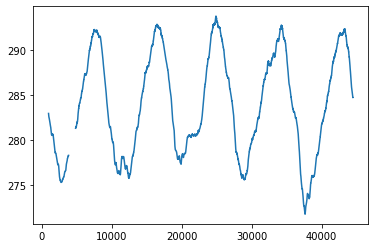

In [102]:
print(time.perf_counter())
plt.plot(df['Vancouver'].rolling(1000).mean())
time.perf_counter()

#### Discussion

Use the rolling() method to find a measure of variance in the data instead of the mean. Check out the pandas rolling documentation to get a sense of what other functions you could use if you wanted to.

Pick a coastal city and a midwestern city to compare the variance by plotting the time series charts

# Exponential smoothing/exponential moving average

In [104]:
smoothed_boston = np.zeros(len(df)-1)

factor = 0.001
print(time.perf_counter())

for k in range(len(df)-1):
    if k == 0:
        smoothed_boston[k]=df.iloc[1]['Boston']
    else:
        current_data = df.iloc[k]['Boston']
        if np.isnan(current_data):
            smoothed_boston[k]=smoothed_boston[k-1]
        else:
            smoothed_boston[k] = (1-factor)*smoothed_boston[k-1] + factor*current_data
            
time.perf_counter()


179678.3022846


179687.3833652

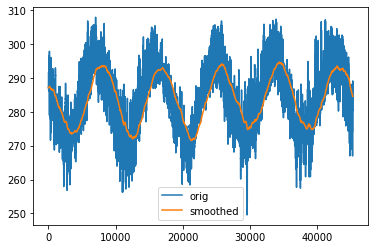

In [99]:
plt.plot(df['Boston'], label='orig')
plt.plot(smoothed_boston, label='smoothed')
plt.legend()

#### Discussion

Why is this called "exponential"? (Try writing out what the first few terms work out to be)

What happens if you make the "factor" in the code much smaller? Try .01, .001.

Do you expect this to be faster or slower than implementing a rolling average?

Try running the two methods - you can even use the time module to measure performance.  Which method is faster?

In applications where you want to smooth data as it arrives in real time, it's very common to use exponential smoothing instead of a rolling average - why do you think this might be?


In [ ]:
## Exponential smoothing is a technique for smoothing time series data using exponential window function and that is why
## it is called exponential.

## If you make the factor smaller then you would get smoother thinner line.

## I expect this to be slower than rolling average.

## Rolling Average method :
##          start time     --   179605.0251331
##          end time       --   179605.0673378
##          ------------------------------------------                
##          time taken   --    0.04220470000291243
##
## Exponential Method:
##         start time     --   179678.3022846
##         end time       --   179687.3833652
##         -------------------------------------------
##         time taken     --   9.081080599979032
##
## As from above calculatio you can clearly see that exponential method takes much longer time than rolling average method.

## Exponential method smoothes out data with high variance where as in rolling average method it only works on past 
## data values and does not work with real time.